DiffractionPattern
$2\Theta$: [15.08306514 30.43568392 35.43028752 36.54995009 40.76411895 43.70111568
 46.37414402 50.86971463 54.99355582 62.87406197 63.3337057  64.15953061
 65.07083613 69.17697481 71.4491477  74.28994857 74.97230841 77.68114103
 79.6942149  80.11058732 81.61093999 82.02507852 85.00701432 86.07814623
 88.30285551]
Intensity: [ 64.28385053  12.03674693 100.          71.30423632  12.2457906
   4.3197304   16.2350695   13.61987196  25.1906716   21.7754795
   3.1821251   19.67508377   8.50194723   9.17206954   6.77978275
   8.58332151   7.17115248   2.11854916   0.98910365   1.65619724
  14.23026822   0.3670501    2.78265024   1.45051419   5.53885486]
--------  ------------  -----------  -----------
(h,k,l)   Multiplicité  2ϴ           Intensité
(0,0,0)   3             15.08306514  64.28385053
(0,0,0)   6             30.43568392  12.03674693
(1,0,-1)  1             35.43028752  100
--------  ------------  -----------  -----------


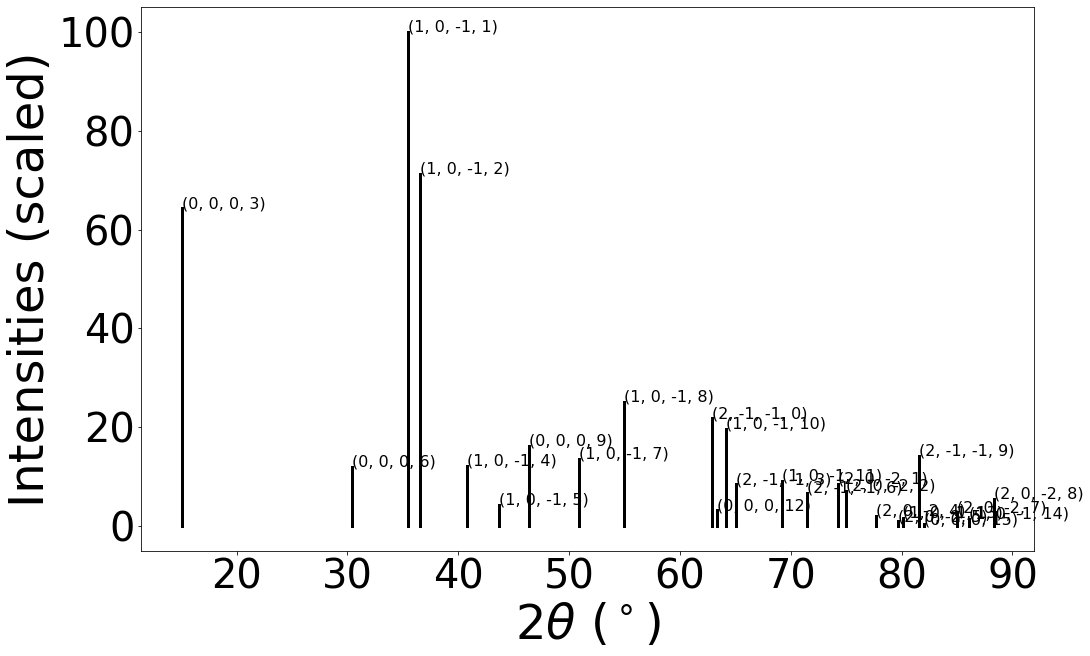

In [18]:
from pymatgen.ext.matproj import MPRester
from pymatgen.entries.compatibility import MaterialsProjectCompatibility
from pymatgen.io.cif import CifWriter
with MPRester("j4TaClKeSNgPZb8Bxm") as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-753098")
    w = CifWriter(structure,0.1)
    w.write_file('mp-753098.cif')
    
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

new_s=SpacegroupAnalyzer(structure).get_conventional_standard_structure()

#Déterminer les 3 premiers pics du diffractogramme pour un rayonnement X incident Cu Kα
# de longueur d’onde λ=1.54060 

from pymatgen.analysis.diffraction.xrd import XRDCalculator
from tabulate import tabulate

#Retournes toutes les valeurs des pics du diffractograme

difr = XRDCalculator(1.54060).get_pattern(new_s)
print(difr)

# Plot le diffractograme

des = XRDCalculator(1.54060).get_plot(new_s)

# Retournes les trois premiers pics ((indice de miller),multipliciré,2theta,intensité)

table = [["(h,k,l)","Multiplicité","2\u03F4","Intensité"],
         ["(0,0,0)",3,15.08306514,64.28385053],
         ["(0,0,0)",6,30.43568392,12.03674693],
         ["(1,0,-1)",1,35.43028752,100]]

print(tabulate(table))